# Covariant using renewable Energy

https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.has_static_covariates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime

In [2]:
url = "https://archive-api.open-meteo.com/v1/archive?latitude=57.05&longitude=9.92&start_date=2020-01-01&end_date=2023-05-22&hourly=temperature_2m"

In [3]:
response = requests.get(url)

In [6]:
'''import csv
# Check if the request was successful (status code 200 indicates success)
if response.status_code == 200:
    # Access the content of the response
    data = response.content

    # Process or save the data as needed
    # For example, if the data is in CSV format, you can use the 'csv' module to read it:
    reader = csv.reader(data.decode('utf-8').splitlines())
    for row in reader:
        # Process each row of data
        print(row)

    # Alternatively, you can save the data to a file
    with open("data.csv", "wb") as file:
        file.write(data)
else:
    # Handle the case when the request was not successful
    print("Error: Failed to retrieve data. Status code:", response.status_code)'''

'import csv\n# Check if the request was successful (status code 200 indicates success)\nif response.status_code == 200:\n    # Access the content of the response\n    data = response.content\n\n    # Process or save the data as needed\n    # For example, if the data is in CSV format, you can use the \'csv\' module to read it:\n    reader = csv.reader(data.decode(\'utf-8\').splitlines())\n    for row in reader:\n        # Process each row of data\n        print(row)\n\n    # Alternatively, you can save the data to a file\n    with open("data.csv", "wb") as file:\n        file.write(data)\nelse:\n    # Handle the case when the request was not successful\n    print("Error: Failed to retrieve data. Status code:", response.status_code)'

In [5]:
'''import requests
import json

url = "https://archive-api.open-meteo.com/v1/archive?latitude=57.05&longitude=9.92&start_date=2020-01-01&end_date=2023-05-22&hourly=temperature_2m"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Convert the response to JSON format
    data = response.json()

    # Extract the today's electric price from the JSON data
    today_price = data['today_price']

    # Use the extracted data as per your requirement
    print("Today's electric price:", today_price)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
while True:
    get_electric_price()
    time.sleep(3600)  # Delay for 1 hour (3600 seconds)'''


'import requests\nimport json\n\nurl = "https://archive-api.open-meteo.com/v1/archive?latitude=57.05&longitude=9.92&start_date=2020-01-01&end_date=2023-05-22&hourly=temperature_2m"\nresponse = requests.get(url)\n\n# Check if the request was successful (status code 200)\nif response.status_code == 200:\n    # Convert the response to JSON format\n    data = response.json()\n\n    # Extract the today\'s electric price from the JSON data\n    today_price = data[\'today_price\']\n\n    # Use the extracted data as per your requirement\n    print("Today\'s electric price:", today_price)\nelse:\n    print("Failed to retrieve data. Status code:", response.status_code)\n    \nwhile True:\n    get_electric_price()\n    time.sleep(3600)  # Delay for 1 hour (3600 seconds)'

In [7]:
df_weather = pd.read_csv('weather.csv', skiprows=3)

In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29712 entries, 0 to 29711
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      29712 non-null  object 
 1   temperature_2m (°C)       29545 non-null  float64
 2   direct_radiation (W/m²)   29545 non-null  float64
 3   diffuse_radiation (W/m²)  29545 non-null  float64
 4   windspeed_10m (m/s)       29545 non-null  float64
 5   windspeed_100m (m/s)      29545 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [9]:
df_weather.head()

,time,temperature_2m (°C),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s)
0,2020-01-01T00:00,2.3,0.0,0.0,2.63,6.04
1,2020-01-01T01:00,1.8,0.0,0.0,2.80,6.04
2,2020-01-01T02:00,1.5,0.0,0.0,3.11,6.41
3,2020-01-01T03:00,1.1,0.0,0.0,2.61,5.76
4,2020-01-01T04:00,0.7,0.0,0.0,2.32,5.47


In [10]:
# change the date form

from datetime import datetime

# define the input and output format
input_format = "%Y-%m-%dT%H:%M"
output_format = "%d.%m.%Y %H:%M"

# convert format
df_weather['time'] = df_weather['time'].apply(lambda x: datetime.strptime(x, input_format).strftime(output_format))

In [11]:
df_weather.head()

,time,temperature_2m (°C),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s)
0,01.01.2020 00:00,2.3,0.0,0.0,2.63,6.04
1,01.01.2020 01:00,1.8,0.0,0.0,2.80,6.04
2,01.01.2020 02:00,1.5,0.0,0.0,3.11,6.41
3,01.01.2020 03:00,1.1,0.0,0.0,2.61,5.76
4,01.01.2020 04:00,0.7,0.0,0.0,2.32,5.47


In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29712 entries, 0 to 29711
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      29712 non-null  object 
 1   temperature_2m (°C)       29545 non-null  float64
 2   direct_radiation (W/m²)   29545 non-null  float64
 3   diffuse_radiation (W/m²)  29545 non-null  float64
 4   windspeed_10m (m/s)       29545 non-null  float64
 5   windspeed_100m (m/s)      29545 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [13]:
# nan data handling_interpolate(method='linear', inplace=True)
df_weather['temperature_2m (°C)'].interpolate(method='linear', inplace=True)

In [14]:
df_weather['direct_radiation (W/m²)'].interpolate(method='linear', inplace=True)
df_weather['diffuse_radiation (W/m²)'].interpolate(method='linear', inplace=True)
df_weather['windspeed_10m (m/s)'].interpolate(method='linear', inplace=True)
df_weather['windspeed_100m (m/s)'].interpolate(method='linear', inplace=True)

In [15]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29712 entries, 0 to 29711
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      29712 non-null  object 
 1   temperature_2m (°C)       29712 non-null  float64
 2   direct_radiation (W/m²)   29712 non-null  float64
 3   diffuse_radiation (W/m²)  29712 non-null  float64
 4   windspeed_10m (m/s)       29712 non-null  float64
 5   windspeed_100m (m/s)      29712 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [17]:
df = pd.read_csv('df_clean.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29712 entries, 0 to 29711
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29712 non-null  int64  
 1   date        29712 non-null  object 
 2   Price       29712 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 696.5+ KB


In [19]:
df_weather = df_weather.rename(columns={'time': 'date'})

In [20]:
# join the df and df_weather
df_total = pd.merge(df, df_weather, on ='date', how = 'inner')

In [21]:
df_total.head()

,Unnamed: 0,date,Price,temperature_2m (°C),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s)
0,0,01.01.2020 00:00,33.42,2.3,0.0,0.0,2.63,6.04
1,1,01.01.2020 01:00,31.77,1.8,0.0,0.0,2.80,6.04
2,2,01.01.2020 02:00,31.57,1.5,0.0,0.0,3.11,6.41
3,3,01.01.2020 03:00,31.28,1.1,0.0,0.0,2.61,5.76
4,4,01.01.2020 04:00,30.85,0.7,0.0,0.0,2.32,5.47


In [22]:
df_total.drop(columns = ['Unnamed: 0'], inplace = True)

In [23]:
df_total.head()

,date,Price,temperature_2m (°C),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s)
0,01.01.2020 00:00,33.42,2.3,0.0,0.0,2.63,6.04
1,01.01.2020 01:00,31.77,1.8,0.0,0.0,2.80,6.04
2,01.01.2020 02:00,31.57,1.5,0.0,0.0,3.11,6.41
3,01.01.2020 03:00,31.28,1.1,0.0,0.0,2.61,5.76
4,01.01.2020 04:00,30.85,0.7,0.0,0.0,2.32,5.47


In [24]:
df_total.describe()

,Price,temperature_2m (°C),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s)
count,29712.000000,29712.0000,29712.000000,29712.000000,29712.000000,29712.000000
mean,109.689398,10.3167,69.750875,51.956179,3.497762,6.032121
std,116.504769,7.9374,137.003612,72.155614,1.658471,2.651064
min,-58.800000,-15.7000,0.000000,0.000000,0.000000,0.000000
25%,31.367500,4.2000,0.000000,0.000000,2.270000,4.180000
50%,73.320000,9.6000,0.000000,3.000000,3.260000,5.840000
75%,144.877500,16.1000,66.000000,94.000000,4.400000,7.620000
max,871.000000,37.5000,749.000000,381.000000,13.020000,20.440000


## Covariates_Price and windspeed_100m (m/s)

static_covariates_values(copy=True)[source]
Return a 2-D array of dimension (component, static variable), containing the static covariate values of the TimeSeries.

Parameters
copy (bool) – Whether to return a copy of the values, otherwise returns a view. Can only return a view if all values have the same dtype. Leave it to True unless you know what you are doing.

Returns
The static covariate values if the series has static covariates, else None.

Return type
Optional[numpy.ndarray]

In [25]:
from darts import TimeSeries
ts_price = TimeSeries.from_dataframe(df_total, time_col='date', value_cols = 'Price', fill_missing_dates=True, freq=None)
ts_wind = TimeSeries.from_dataframe(df_total, time_col='date', value_cols = 'windspeed_100m (m/s)', fill_missing_dates=True, freq=None)

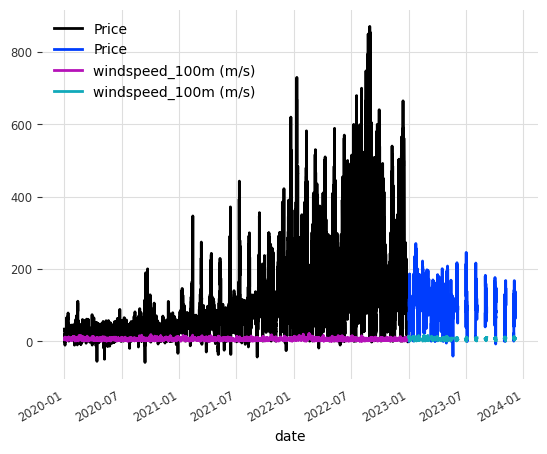

In [26]:
# set aside last 36 months of each series as validation set:
train_price, test_price = ts_price.split_after(pd.Timestamp("01.01.2023 01:00"))
train_wind, test_wind = ts_wind.split_after(pd.Timestamp("01.01.2023 01:00"))

train_price.plot()
test_price.plot()
train_wind.plot()
test_wind.plot()

https://unit8co.github.io/darts/quickstart/00-quickstart.html#Regression-forecasting-models

There are two kinds of covariate time series in Darts:

* past_covariates

past_covariates are series not necessarily known ahead of the forecast time. Those can for instance represent things that have to be measured and are not known upfront. Models do not use the future values of past_covariates when making forecasts.
* future_covariates

future_covariates are series which are known in advance, up to the forecast horizon. This can represent things such as calendar information, holidays, weather forecasts, etc. Models that accept future_covariates will look at the future values (up to the forecast horizon) when making forecasts.

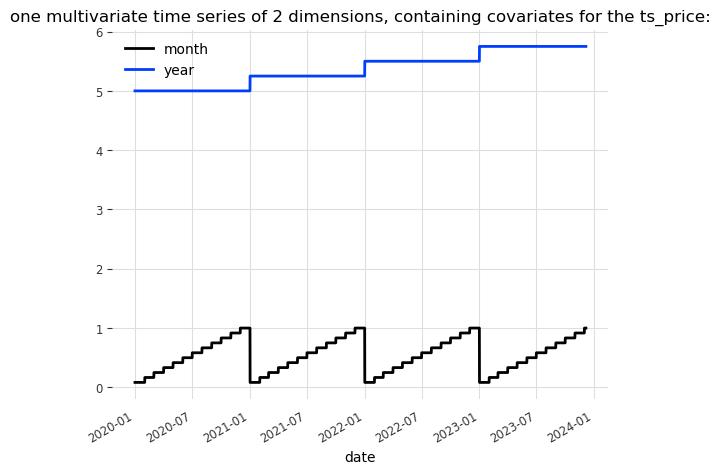

In [27]:
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr

price_covs = concatenate(
    [
        dt_attr(ts_price.time_index, "month", dtype=np.float32) / 12,
        (dt_attr(ts_price.time_index, "year", dtype=np.float32) - 2000) / 4,
    ],
    axis="component",
)

wind_covs = concatenate(
    [
        dt_attr(ts_wind.time_index, "month", dtype=np.float32) / 12,
        (dt_attr(ts_wind.time_index, "year", dtype=np.float32) - 2000) / 4,
    ],
    axis="component",
)

price_covs.plot()
plt.title(
    "one multivariate time series of 2 dimensions, containing covariates for the ts_price:"
);

In [28]:
print(price_covs)
print(wind_covs)

<TimeSeries (DataArray) (date: 34440, component: 2, sample: 1)>
array([[[0.08333334],
        [5.        ]],

       [[0.08333334],
        [5.        ]],

       [[0.08333334],
        [5.        ]],

       ...,

       [[1.        ],
        [5.75      ]],

       [[1.        ],
        [5.75      ]],

       [[1.        ],
        [5.75      ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2020-01-01 ... 2023-12-05T23:00:00
  * component  (component) object 'month' 'year'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
<TimeSeries (DataArray) (date: 34440, component: 2, sample: 1)>
array([[[0.08333334],
        [5.        ]],

       [[0.08333334],
        [5.        ]],

       [[0.08333334],
        [5.        ]],

       ...,

       [[1.        ],
        [5.75      ]],

       [[1.        ],
        [5.75      ]],

       [[1.        ],
        [5.75      ]]], dtype=float32)
Coordinates:
  * date

In [33]:
df_total.columns

Index(['date', 'Price', 'temperature_2m (°C)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'windspeed_10m (m/s)',
       'windspeed_100m (m/s)'],
      dtype='object')

In [ ]:
covariance = np.cov(ts_price, ts_wind)[0][1]

print("Covariance:", covariance)